In [172]:
import pandas as pd
import numpy as np
import json
from sklearn.utils import shuffle

In [173]:
file = open("F:\Code\HUST\Vietnamese-text-classification\content.json", encoding = 'utf8')

In [174]:
data = json.load(file)

In [175]:
df = pd.DataFrame(data)

In [176]:
df.head()

,id,author,content,crawled_at,picture_count,processed,source,title,topic,url,category
0,2,Lâm Thỏa,"*Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...",2022-06-07 14:05:51.433712,2,0,None,HLV Malaysia dọa ngáng đường Việt Nam,Thể thao,https://vnexpress.net/hlv-malaysia-doa-ngang-d...,0
1,3,Thanh Tâm,"""Các khu dân cư của thành phố Severodonetsk đã...",2022-06-07 14:05:51.797545,2,0,None,Nga tuyên bố 'giải phóng' hoàn toàn khu dân cư...,Thế giới,https://vnexpress.net/nga-tuyen-bo-giai-phong-...,1
2,4,Thảo Mi,"Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...",2022-06-07 14:05:53.482540,2,0,None,Ông Tất Thành Cang được đề nghị giảm án,Pháp luật,https://vnexpress.net/ong-tat-thanh-cang-duoc-...,1
3,5,Quốc Thắng,"Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...",2022-06-07 14:05:53.848085,2,0,None,Nghi can sát hại cha bị bắt,Pháp luật,https://vnexpress.net/nghi-can-sat-hai-cha-bi-...,1
4,6,Vũ Hoàng,"Thủ tướng Anh Boris Johnson hôm 6/6 đã ""thoát ...",2022-06-07 14:05:54.226303,1,0,None,Sóng gió chờ đón Thủ tướng Anh hậu bỏ phiếu bấ...,Thế giới,https://vnexpress.net/thoat-hiem-bat-tin-nhiem...,1


In [177]:
print(df.shape)
df = shuffle(df)

(19411, 11)


In [178]:
columns = ['id', 'crawled_at', 'processed', 'source', 'topic']
df = df.drop(columns=columns)

In [179]:
print(df.shape)

(19411, 6)


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19411 entries, 17508 to 4857
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author         19411 non-null  object
 1   content        19411 non-null  object
 2   picture_count  19411 non-null  int64 
 3   title          19411 non-null  object
 4   url            19411 non-null  object
 5   category       19411 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [181]:
content_array = np.array(df['content'])

In [182]:
import re
import nltk

In [183]:
corpus = []

for i in range(0, 19410):
    newArr = re.sub('/([\u0041-\u005A\u0061-\u007A\u00AA\u00B5\u00BA\u00C0-\u00D6\u00D8-\u00F6\u00F8-\u02C1\u02C6-\u02D1\u02E0-\u02E4\u02EC\u02EE\u0370-\u0374\u0376\u0377\u037A-\u037D\u0386\u0388-\u038A\u038C\u038E-\u03A1\u03A3-\u03F5\u03F7-\u0481\u048A-\u0527\u0531-\u0556\u0559\u0561-\u0587\u05D0-\u05EA\u05F0-\u05F2\u0620-\u064A\u066E\u066F\u0671-\u06D3\u06D5\u06E5\u06E6\u06EE\u06EF\u06FA-\u06FC\u06FF\u0710\u0712-\u072F\u074D-\u07A5\u07B1\u07CA-\u07EA\u07F4\u07F5\u07FA\u0800-\u0815\u081A\u0824\u0828\u0840-\u0858\u08A0\u08A2-\u08AC\u0904-\u0939\u093D\u0950\u0958-\u0961\u0971-\u0977\u0979-\u097F\u0985-\u098C\u098F\u0990\u0993-\u09A8\u09AA-\u09B0\u09B2\u09B6-\u09B9\u09BD\u09CE\u09DC\u09DD\u09DF-\u09E1\u09F0\u09F1\u0A05-\u0A0A\u0A0F\u0A10\u0A13-\u0A28\u0A2A-\u0A30\u0A32\u0A33\u0A35\u0A36\u0A38\u0A39\u0A59-\u0A5C\u0A5E\u0A72-\u0A74\u0A85-\u0A8D\u0A8F-\u0A91\u0A93-\u0AA8\u0AAA-\u0AB0\u0AB2\u0AB3\u0AB5-\u0AB9\u0ABD\u0AD0\u0AE0\u0AE1\u0B05-\u0B0C\u0B0F\u0B10\u0B13-\u0B28\u0B2A-\u0B30\u0B32\u0B33\u0B35-\u0B39\u0B3D\u0B5C\u0B5D\u0B5F-\u0B61\u0B71\u0B83\u0B85-\u0B8A\u0B8E-\u0B90\u0B92-\u0B95\u0B99\u0B9A\u0B9C\u0B9E\u0B9F\u0BA3\u0BA4\u0BA8-\u0BAA\u0BAE-\u0BB9\u0BD0\u0C05-\u0C0C\u0C0E-\u0C10\u0C12-\u0C28\u0C2A-\u0C33\u0C35-\u0C39\u0C3D\u0C58\u0C59\u0C60\u0C61\u0C85-\u0C8C\u0C8E-\u0C90\u0C92-\u0CA8\u0CAA-\u0CB3\u0CB5-\u0CB9\u0CBD\u0CDE\u0CE0\u0CE1\u0CF1\u0CF2\u0D05-\u0D0C\u0D0E-\u0D10\u0D12-\u0D3A\u0D3D\u0D4E\u0D60\u0D61\u0D7A-\u0D7F\u0D85-\u0D96\u0D9A-\u0DB1\u0DB3-\u0DBB\u0DBD\u0DC0-\u0DC6\u0E01-\u0E30\u0E32\u0E33\u0E40-\u0E46\u0E81\u0E82\u0E84\u0E87\u0E88\u0E8A\u0E8D\u0E94-\u0E97\u0E99-\u0E9F\u0EA1-\u0EA3\u0EA5\u0EA7\u0EAA\u0EAB\u0EAD-\u0EB0\u0EB2\u0EB3\u0EBD\u0EC0-\u0EC4\u0EC6\u0EDC-\u0EDF\u0F00\u0F40-\u0F47\u0F49-\u0F6C\u0F88-\u0F8C\u1000-\u102A\u103F\u1050-\u1055\u105A-\u105D\u1061\u1065\u1066\u106E-\u1070\u1075-\u1081\u108E\u10A0-\u10C5\u10C7\u10CD\u10D0-\u10FA\u10FC-\u1248\u124A-\u124D\u1250-\u1256\u1258\u125A-\u125D\u1260-\u1288\u128A-\u128D\u1290-\u12B0\u12B2-\u12B5\u12B8-\u12BE\u12C0\u12C2-\u12C5\u12C8-\u12D6\u12D8-\u1310\u1312-\u1315\u1318-\u135A\u1380-\u138F\u13A0-\u13F4\u1401-\u166C\u166F-\u167F\u1681-\u169A\u16A0-\u16EA\u1700-\u170C\u170E-\u1711\u1720-\u1731\u1740-\u1751\u1760-\u176C\u176E-\u1770\u1780-\u17B3\u17D7\u17DC\u1820-\u1877\u1880-\u18A8\u18AA\u18B0-\u18F5\u1900-\u191C\u1950-\u196D\u1970-\u1974\u1980-\u19AB\u19C1-\u19C7\u1A00-\u1A16\u1A20-\u1A54\u1AA7\u1B05-\u1B33\u1B45-\u1B4B\u1B83-\u1BA0\u1BAE\u1BAF\u1BBA-\u1BE5\u1C00-\u1C23\u1C4D-\u1C4F\u1C5A-\u1C7D\u1CE9-\u1CEC\u1CEE-\u1CF1\u1CF5\u1CF6\u1D00-\u1DBF\u1E00-\u1F15\u1F18-\u1F1D\u1F20-\u1F45\u1F48-\u1F4D\u1F50-\u1F57\u1F59\u1F5B\u1F5D\u1F5F-\u1F7D\u1F80-\u1FB4\u1FB6-\u1FBC\u1FBE\u1FC2-\u1FC4\u1FC6-\u1FCC\u1FD0-\u1FD3\u1FD6-\u1FDB\u1FE0-\u1FEC\u1FF2-\u1FF4\u1FF6-\u1FFC\u2071\u207F\u2090-\u209C\u2102\u2107\u210A-\u2113\u2115\u2119-\u211D\u2124\u2126\u2128\u212A-\u212D\u212F-\u2139\u213C-\u213F\u2145-\u2149\u214E\u2183\u2184\u2C00-\u2C2E\u2C30-\u2C5E\u2C60-\u2CE4\u2CEB-\u2CEE\u2CF2\u2CF3\u2D00-\u2D25\u2D27\u2D2D\u2D30-\u2D67\u2D6F\u2D80-\u2D96\u2DA0-\u2DA6\u2DA8-\u2DAE\u2DB0-\u2DB6\u2DB8-\u2DBE\u2DC0-\u2DC6\u2DC8-\u2DCE\u2DD0-\u2DD6\u2DD8-\u2DDE\u2E2F\u3005\u3006\u3031-\u3035\u303B\u303C\u3041-\u3096\u309D-\u309F\u30A1-\u30FA\u30FC-\u30FF\u3105-\u312D\u3131-\u318E\u31A0-\u31BA\u31F0-\u31FF\u3400-\u4DB5\u4E00-\u9FCC\uA000-\uA48C\uA4D0-\uA4FD\uA500-\uA60C\uA610-\uA61F\uA62A\uA62B\uA640-\uA66E\uA67F-\uA697\uA6A0-\uA6E5\uA717-\uA71F\uA722-\uA788\uA78B-\uA78E\uA790-\uA793\uA7A0-\uA7AA\uA7F8-\uA801\uA803-\uA805\uA807-\uA80A\uA80C-\uA822\uA840-\uA873\uA882-\uA8B3\uA8F2-\uA8F7\uA8FB\uA90A-\uA925\uA930-\uA946\uA960-\uA97C\uA984-\uA9B2\uA9CF\uAA00-\uAA28\uAA40-\uAA42\uAA44-\uAA4B\uAA60-\uAA76\uAA7A\uAA80-\uAAAF\uAAB1\uAAB5\uAAB6\uAAB9-\uAABD\uAAC0\uAAC2\uAADB-\uAADD\uAAE0-\uAAEA\uAAF2-\uAAF4\uAB01-\uAB06\uAB09-\uAB0E\uAB11-\uAB16\uAB20-\uAB26\uAB28-\uAB2E\uABC0-\uABE2\uAC00-\uD7A3\uD7B0-\uD7C6\uD7CB-\uD7FB\uF900-\uFA6D\uFA70-\uFAD9\uFB00-\uFB06\uFB13-\uFB17\uFB1D\uFB1F-\uFB28\uFB2A-\uFB36\uFB38-\uFB3C\uFB3E\uFB40\uFB41\uFB43\uFB44\uFB46-\uFBB1\uFBD3-\uFD3D\uFD50-\uFD8F\uFD92-\uFDC7\uFDF0-\uFDFB\uFE70-\uFE74\uFE76-\uFEFC\uFF21-\uFF3A\uFF41-\uFF5A\uFF66-\uFFBE\uFFC2-\uFFC7\uFFCA-\uFFCF\uFFD2-\uFFD7\uFFDA-\uFFDC]+)/g', ' ', content_array[i])
    newArr = newArr.lower()
    if i == 0:
        print(newArr)
    newArr = newArr.split()
    newArr = ' '.join(newArr)
    corpus.append(newArr)
    

tôi chỉ tham dự các khóa đào tạo ngắn hạn, các hội nghị hội thảo, hoặc học qua làm việc. tôi không nói cách đào tạo nào tốt hơn, nhưng rõ ràng thời gian trung học và đại học đã có thể được tận dụng hiệu quả hơn để đem lại kỹ năng và kiến thức cần thiết cho mọi người. một trong các kỹ năng cần cho công việc của tôi là trình bày. vào cơ quan khoảng một năm tôi mới có dịp trình bày ở một hội thảo quốc tế. trong khi đợi đến lượt, tôi rất căng thẳng và mất bình tĩnh. sau đó tôi mới hiểu là do mình chưa bao giờ được học về cách trình bày, chưa được dạy cách kiểm soát tâm lý, cảm xúc. tới bây giờ, tôi vẫn chứng kiến một số bạn trẻ làm việc đã lâu nhưng kỹ năng rất hạn chế. có khá nhiều nghịch lý ở các cặp mệnh đề mâu thuẫn trong mối quan hệ giữa giáo dục, đào tạo với thực tế làm việc. ví dụ: khả năng giải các bài toán phương trình, bất đẳng thức (lý thuyết, ít hoặc không có tính ứng dụng) tốt, trong khi khả năng giải các bài toán có lời văn (mô phỏng vấn đề thực) kém hơn; điểm thi ielts/toefl

In [184]:
corpus[0]

'tôi chỉ tham dự các khóa đào tạo ngắn hạn, các hội nghị hội thảo, hoặc học qua làm việc. tôi không nói cách đào tạo nào tốt hơn, nhưng rõ ràng thời gian trung học và đại học đã có thể được tận dụng hiệu quả hơn để đem lại kỹ năng và kiến thức cần thiết cho mọi người. một trong các kỹ năng cần cho công việc của tôi là trình bày. vào cơ quan khoảng một năm tôi mới có dịp trình bày ở một hội thảo quốc tế. trong khi đợi đến lượt, tôi rất căng thẳng và mất bình tĩnh. sau đó tôi mới hiểu là do mình chưa bao giờ được học về cách trình bày, chưa được dạy cách kiểm soát tâm lý, cảm xúc. tới bây giờ, tôi vẫn chứng kiến một số bạn trẻ làm việc đã lâu nhưng kỹ năng rất hạn chế. có khá nhiều nghịch lý ở các cặp mệnh đề mâu thuẫn trong mối quan hệ giữa giáo dục, đào tạo với thực tế làm việc. ví dụ: khả năng giải các bài toán phương trình, bất đẳng thức (lý thuyết, ít hoặc không có tính ứng dụng) tốt, trong khi khả năng giải các bài toán có lời văn (mô phỏng vấn đề thực) kém hơn; điểm thi ielts/toef

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

countv = CountVectorizer(max_features = 1200)
X = countv.fit_transform(corpus).toarray()
y = df.iloc[0:19410, 5].values

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

LOGISTIC REGRESSION

In [187]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [188]:
print(X_test.shape)

(3882, 1200)


In [189]:
print(X_test)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  1]
 [10  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  3]
 [ 0  1  0 ...  0  1  0]]


In [190]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1622  323]
 [ 271 1666]]


In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1945
           1       0.84      0.86      0.85      1937

    accuracy                           0.85      3882
   macro avg       0.85      0.85      0.85      3882
weighted avg       0.85      0.85      0.85      3882



In [192]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 84.7


In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

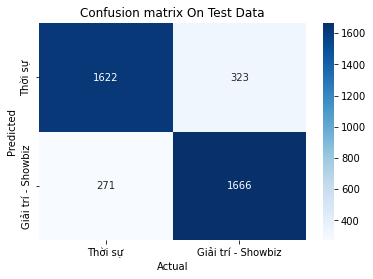

In [194]:
new_cm = pd.DataFrame(cm , index = ['Thời sự','Giải trí - Showbiz'] , columns = ['Thời sự','Giải trí - Showbiz'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Thời sự','Giải trí - Showbiz'], yticklabels = ['Thời sự','Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

GAUSSIAN NAIVE BAYES

In [195]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [196]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1534  411]
 [ 266 1671]]


In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1945
           1       0.80      0.86      0.83      1937

    accuracy                           0.83      3882
   macro avg       0.83      0.83      0.83      3882
weighted avg       0.83      0.83      0.83      3882



In [198]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 82.56


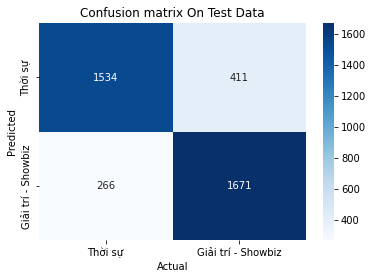

In [199]:
new_cm = pd.DataFrame(cm , index = ['Thời sự','Giải trí - Showbiz'] , columns = ['Thời sự','Giải trí - Showbiz'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Thời sự','Giải trí - Showbiz'], yticklabels = ['Thời sự','Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

BERNOULLI NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

In [ ]:
new_cm = pd.DataFrame(cm , index = ['Thời sự','Giải trí - Showbiz'] , columns = ['Thời sự','Giải trí - Showbiz'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Thời sự','Giải trí - Showbiz'], yticklabels = ['Thời sự','Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

SUPPORT VECTOR MACHINES

In [200]:
from sklearn.svm import NuSVC

classifier = NuSVC(max_iter=200)
classifier.fit(X_train, y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


NuSVC(max_iter=200)

In [201]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1281  664]
 [ 149 1788]]


In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1945
           1       0.73      0.92      0.81      1937

    accuracy                           0.79      3882
   macro avg       0.81      0.79      0.79      3882
weighted avg       0.81      0.79      0.79      3882



In [203]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuracy: 79.06


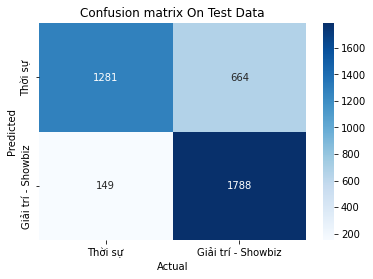

In [204]:
new_cm = pd.DataFrame(cm , index = ['Thời sự','Giải trí - Showbiz'] , columns = ['Thời sự','Giải trí - Showbiz'])
sns.heatmap(new_cm,cmap= 'Blues', annot = True, fmt='',xticklabels = ['Thời sự','Giải trí - Showbiz'], yticklabels = ['Thời sự','Giải trí - Showbiz'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()